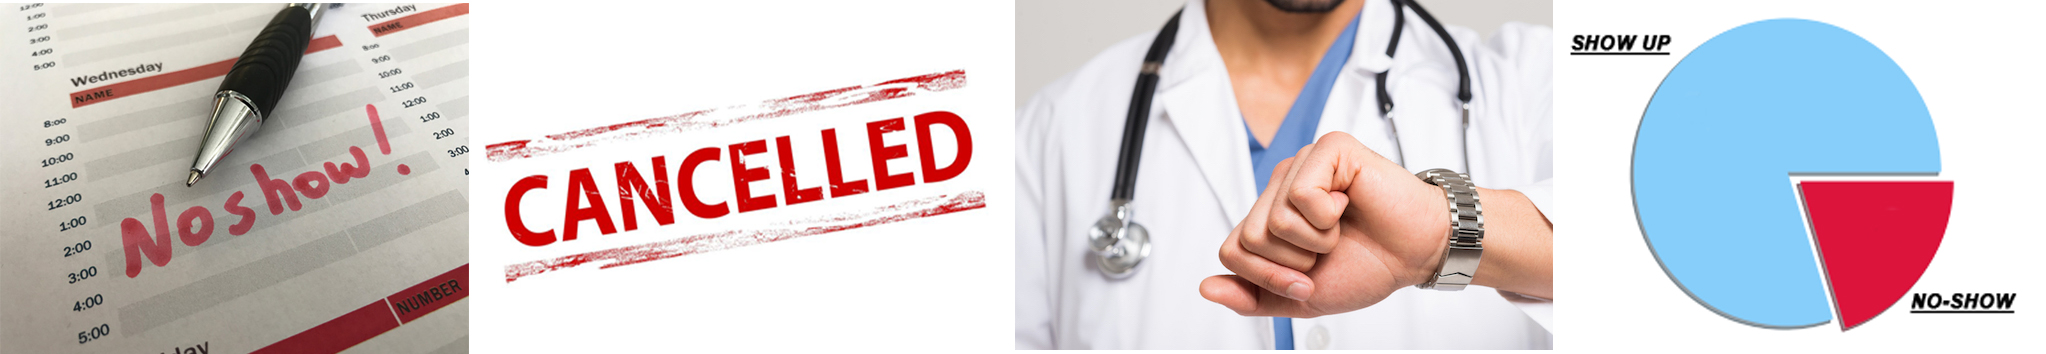

### Why do 20% of patients miss their scheduled appointments?

# Investigate Medical Appointments No-show Dataset


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. Several characteristics of the patient are included in each row. Age, gender, neighborhood, and scholarship are some personal information about the patient. Moreover, some medical data are provided like hypertension, diabetes, handicap, and alcoholism. below is a list of columns heads for the dataset with a description of the value type provided.

#### Data List
><br> **01 - PatientId** / Identification of a patient
<br>**02 - AppointmentID** / Identification of each appointment
<br> **03 - Gender** / Male or Female 
<br> **04 - ScheduledDay** / The day of the actuall appointment, when they have to visit the doctor.
<br>**05 - AppointmentDay**  / The day someone called or registered the appointment, this is before appointment of course.
<br>**06 - Age**  /  How old is  the patient.
<br>**07 - Neighbourhood** Where the appointment takes place.
<br>**08 - Scholarship**  /  True of False . Observation, this is a broad topic, consider reading [this article](https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia)
<br>**09 - Hipertension**  / True or False
<br>**10 - Diabetes**  / True or False
<br>**11 - Alcoholism**  / True or False
<br>**12 - Handcap**  / True or False
<br>**13 - SMS_received** 1 or more messages sent to the patient.
<br>**14 - No-show**  /  True or False.

From the data provided for each appointment, four variables have been chosen to be evaluated for their effect on whether the patient would show up or not. Using those factors, several questions have been posed to measure the effect for each on the major cause of no-show. By answering those questions new findings will be recorded for future development.  

> ##### (1)  How age is related to showing up or no-show?
> ##### (2) Do days of the week differ in patients' attendance rates?
> ##### (3) Do a specific gender has a higher No-show than the other?
> ##### (4) Do patients who received SMS showed up more than who didn't receive?

In [1]:
# Import libraries will be used to get findings.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# Load dataset file & read the first rows to know aboout it.
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# Check the numeric columns for outliers and wrong values.
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
# Check if there are any non value cells (NaN).
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [6]:
# Check if there any duplicated data.
df.duplicated().sum()

0

In [7]:
# Check if columns data types are suitable for operations.  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### Data Cleaning
##### After inspecting the data some issues have been found and will be fixed as follows:

- Drop one row of negative value in Age column value & five rows of 115 age value which is considered as outlier & misleading.
- Drop "PatientId" & "AppointmentID" as they won't be used while investigating.
- Drop "AppointmentDay" as it reprsents a date before scheduled appointment & it won't be included while investigating.
- Convert all columns heads to lowercase letters for ease of handling & manipulating.
- Rename misspelled column heads, shorten some & use underscore instead of dash for ease of handling and manipulating.
- Change "Scheduled day" data type to date and time pandas series.
- Create a new column represents day of the week, to be extracted from "Scheduled day" column.

In [8]:
# Drop 1 row of negative value in Age column value & 5 rows of 115 age value which is considered as outlier & misleading.
# Check again to ensure that rows have been deleted.
df.drop(df.query('Age < 0' or 'Age >= 115').index, inplace=True)
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# Drop "PatientId" & "AppointmentID" as they won't be used while investigating.
# Drop "AppointmentDay" as it reprsents a date before scheduled appointment & it won't be included while investigating.
df.drop(['PatientId', 'AppointmentID', 'AppointmentDay'], axis = 1, inplace=True)

In [10]:
# Convert all columns heads to lowercase letters for ease of handling & manipulating.
# Rename misspelled column heads, shorten some & use underscore instead of dash for ease of handling and manipulating.
# Print dataset first rows to ensure of change.
new_columns = df.columns.str.lower()
df.columns = new_columns
df = df.rename(columns = {'scheduledday' : 'sched_day', 'hipertension' : 'hypertension',
                          'handcap' : 'handicap', 'no-show' : 'no_show'})
df.head()

,gender,sched_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
# Change "Scheduled day" data type to date and time pandas series.
# Check for changing is applied.
df['sched_day'] = pd.to_datetime(df['sched_day'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   gender         110526 non-null  object             
 1   sched_day      110526 non-null  datetime64[ns, UTC]
 2   age            110526 non-null  int64              
 3   neighbourhood  110526 non-null  object             
 4   scholarship    110526 non-null  int64              
 5   hypertension   110526 non-null  int64              
 6   diabetes       110526 non-null  int64              
 7   alcoholism     110526 non-null  int64              
 8   handicap       110526 non-null  int64              
 9   sms_received   110526 non-null  int64              
 10  no_show        110526 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(7), object(3)
memory usage: 10.1+ MB


In [12]:
# Create a new column represents day of the week, to be extracted from "Scheduled day" column.
# Create a dictionary replacing the day's full name with abbreviations for ease of handling and manipulating.
# Add the new column "week_day" to the data frame.
# Check for changing is applied.
df['week_day'] = df['sched_day'].dt.day_name()
days = {'Friday':'Fri', 'Saturday':'Sat', 'Sunday':'Sun', 'Monday':'Mon', 'Tuesday':'Tue', 'Wednesday':'Wed', 'Thursday':'Thu'}
df['week_day'] = df['week_day'].apply(lambda x: days[x])
df.head()

,gender,sched_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,week_day
0,F,2016-04-29 18:38:08+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Fri
1,M,2016-04-29 16:08:27+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Fri
2,F,2016-04-29 16:19:04+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Fri
3,F,2016-04-29 17:29:31+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Fri
4,F,2016-04-29 16:07:23+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Fri


<a id='eda'></a>
## Exploratory Data Analysis

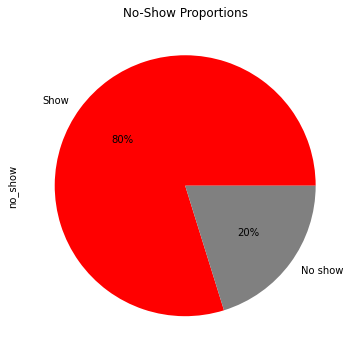

In [13]:
# Create a bar chart represents No show column.
colors = ['red', 'grey']
df.no_show.value_counts().plot.pie(autopct='%1.0f%%', figsize= (6,6), colors = colors, 
                                   title = 'No-Show Proportions', labels = ('Show', 'No show'));

In [14]:
# Show each value counts of No show column.
df.no_show.value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

*Generally, most of the patients committed to their medical appointments. With a percentage of 80% attended, against a little percentage didn't show with a 20%. Let's explore some elements related to the subject to see how they may affect attending medical appointments.*

### (1)  How age is related to showing up or no-show?

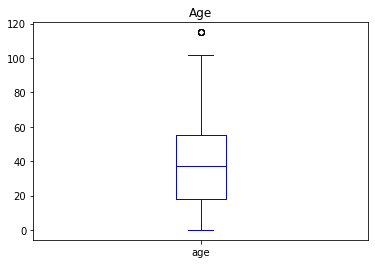

In [15]:
# Create a box plot represents Age column.
df.age.plot(kind='box', color = 'blue', title = 'Age');

##### From the box plot above for age column and rates below, obviously, most patients range from 18 to 55 years old.

In [16]:
# Show the numeric data of Age column.
df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

Text(0, 0.5, 'age')

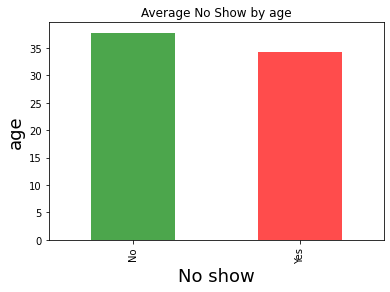

In [17]:
# Create a visualization represents mean age for each group of Show & No show.
colors = ['green', 'red']
age_mean = df.groupby('no_show')['age'].mean()
age_mean.plot(kind='bar', title='Average No Show by age', color=colors, alpha=.7);
plt.xlabel('No show', fontsize=18)
plt.ylabel('age', fontsize=18)

##### With consideration to the bar chart above, which measure mean age for each group who show up or no show for appointments, older patients tend to be more committed to appointments.

### (2) Do days of the week differ in patients' attendance rates?

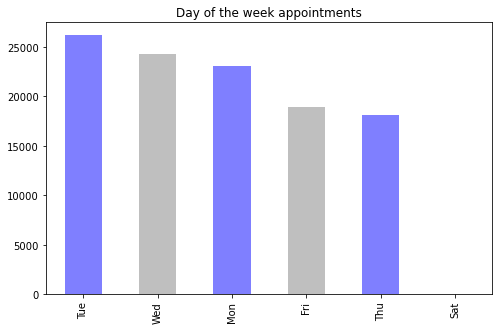

In [18]:
# Create a bar chart represents Week day column.
colors = ['blue', 'grey']
df.week_day.value_counts().plot(kind='bar', color = colors, alpha = 0.5, 
                                figsize = (8,5), title = 'Day of the week appointments');

##### From the bar chart and values per each day, we can notice that majority of the appointments took place on tuesdays. While, the least counts occurs on saturdays.

In [19]:
# Show each value counts of Week day column.
df.week_day.value_counts()

Tue    26168
Wed    24262
Mon    23084
Fri    18915
Thu    18073
Sat       24
Name: week_day, dtype: int64

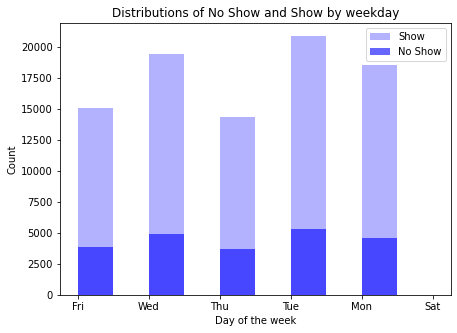

In [20]:
# Create a data frame separated for Show & No show values. 
# Create a visualization represents counts for Show & No show by weekdays.

df_show = df.query('no_show == "No"')
df_no_show = df.query('no_show == "Yes"')
colors = ['blue'] 
fig, ax = plt.subplots(figsize =(7,5))
ax.hist(df_show['week_day'], color = colors, alpha=0.3, label='Show')
ax.hist(df_no_show['week_day'], color = colors, alpha=0.6, label='No Show')
ax.set_title('Distributions of No Show and Show by weekday')
ax.set_xlabel('Day of the week')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show();

##### The above illustration presents show up & no-show groups each day. Respectively to the number of appointments per day, counts who show & no-show were typically reflected. Whereby, the least days for attending are Thursdays & Fridays.

### (3) Do a specific gender has a higher No-show than the other?

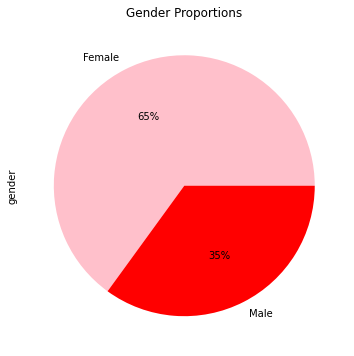

In [21]:
# Create a bar chart represents Gender column.
colors = ['pink', 'red']
df.gender.value_counts().plot.pie(autopct='%1.0f%%', figsize= (6,6), colors = colors, 
                                   title = 'Gender Proportions', labels = ('Female', 'Male'));

##### From the pie chart females are the greater proportion, female patients take way more care of their health in comparison to male patients.

In [22]:
# Show each value counts of Gender column.
df.gender.value_counts()

F    71839
M    38687
Name: gender, dtype: int64

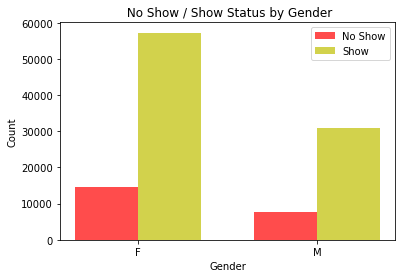

In [23]:
# Create a data frame separated for Show & No show values, for female & male patients.
# Create a visualization represents counts for Show & No show by gender.

noshow = df_no_show.gender.value_counts()
show = df_show.gender.value_counts()

ind = np.arange(len(noshow))
width = 0.35

noshow_bars = plt.bar(ind, noshow, width, color='r', alpha=.7, label='No Show')
show_bars = plt.bar(ind + width, show, width, color='y', alpha=.7, label='Show')

plt.ylabel('Count')
plt.xlabel('Gender')
plt.title(' No Show / Show Status by Gender')
locations = ind + width / 2 
labels = ['F', 'M']

plt.xticks(locations, labels)
plt.legend()

##### The bar chart presents gender distribution for show & no-show groups. As females were the majority of the patients, they are the preponderance ​for showing up for appointments against males.

### (4) Do patients who received SMS showed up more than who didn't receive?

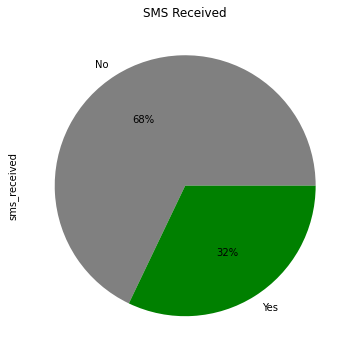

In [24]:
# Create a bar chart represents SMS received column.
colors = ['grey', 'green']
df.sms_received.value_counts().plot.pie(autopct='%1.0f%%', figsize= (6,6), colors = colors, 
                                   title = 'SMS Received', labels = ('No', 'Yes'));

##### The bar chart clearly shows that 68 % of patients did not receive SMS.

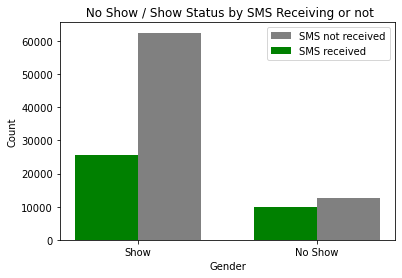

In [25]:
# Create a data frame for patients who received SMS or not for their appointment.
# Create a visualization represents counts of patients who received SMS or not, and Show or No show

df_sms_true = df.query("sms_received == 1")
df_sms_false = df.query("sms_received == 0")

sms_true_noshow = df_sms_true.no_show.value_counts()
sms_false_noshow = df_sms_false.no_show.value_counts()

ind = np.arange(len(sms_true_noshow))
width = 0.35

show_bars = plt.bar(ind + width, sms_false_noshow, width, color = 'grey', label='SMS not received')
noshow_bars = plt.bar(ind, sms_true_noshow, width, color = 'green', label='SMS received')

plt.ylabel('Count')
plt.xlabel('Gender')
plt.title(' No Show / Show Status by SMS Receiving or not')
locations = ind + width / 2 
labels = ['Show', 'No Show']

plt.xticks(locations, labels);
plt.legend()

##### From the bar chart above it's notable that although the majority didn't receive SMS, they still show up for their appointments. Therefore this matter doesn't affect show neither no-show.

<a id='conclusions'></a>
## Conclusions

> #### Results
By studying various elements to get to know its impact on committing  for medical appointments, we can conclude the following:
> 1. A slight difference between show up and no-show patients in mean age, doesn't make age an effective factor. But it may give an impression that older people are more committed.
2. The number of no-shows is the highest on Tuesdays and the least on Thursdays and Fridays. But it's a related ratio to the number of appointments distributed on a week. So weekday has no effect on a no-show.
3. Regarding gender, greater number of females register for appointments, as well, they show up for their medical visits more than males.
4. As shown above, 68 % of patients didn't receive SMS. In contrast, a large number of these patients showed up. That's why, sending SMSs don't affect no-shows at all.

>hereby, if we like to decrease the number of no-shows, we can recommend paying more attention to younger and male patients. Meanwhile, study an alternative for SMS communication way to motivate patients to show up. 

> #### Limitations 
There are multiple limitations in the dataset provided as follows:
> 1. The neighborhood variable is not informative since we don't have location data. Likely, if we got data about the distance between homes and medical premises, we could obtain how short or long distances can affect no-shows.
2. Lack of knowing the type and cause of medical visits affects evaluation and predicting of no-shows for appointments. Data like what kind of clinic or department patients are registering for, and medical complaints they registering about. In the case of having these data, it would be magnificently valuable for the analysis.
3. Most of the data provided are categorical, which limited the types of analysis.